# SQLAlchemy Homework - Surfs Up!

To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

----------------------------------------------------------------------------------------------------------------------------

# Step 1 - Climate Analysis and Exploration

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Precipitation Analysis

In [11]:
#Inspect the tables, so that we know column names
inspector = inspect(engine)
columns_measurement = inspector.get_columns('measurement')
for c in columns_measurement:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns_station = inspector.get_columns('station')
for c in columns_station:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Peek data available in table
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [14]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Climate Analysis

In [17]:


# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Checking last date available in table
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

#Separate data to avoid hardcode
print(last_date[0].split('-')) 
lastdate_yr = int(last_date[0].split('-')[0])
lastdate_mth = int(last_date[0].split('-')[1])
lastdate_day = int(last_date[0].split('-')[2])

['2017', '08', '23']


In [28]:
# Calculate the date 1 year ago from the last data point in the database
from dateutil.relativedelta import relativedelta

a_year_ago = dt.date(lastdate_yr, lastdate_mth, lastdate_day) - relativedelta(years=1)

In [29]:
# Perform a query to retrieve the data and precipitation scores
precipitation_by_date = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= a_year_ago).all()

In [50]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_precipitation = pd.DataFrame(precipitation_by_date, columns=['date', 'prcp'])

df_precipitation_by_date = df_precipitation.groupby("date").max()
df_precipitation_by_date.head()

,prcp
date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18


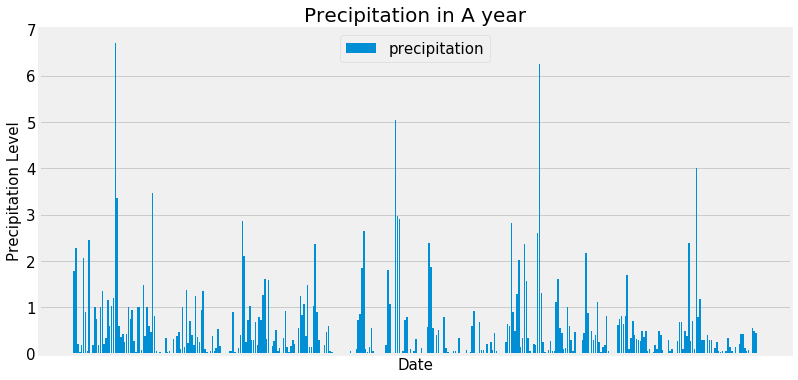

In [34]:
#Plotting the Precipitation data
plt.figure(figsize=(12,6))
plt.bar(df_precipitation_by_date.index, df_precipitation_by_date["prcp"], label = 'precipitation')

plt.title("Precipitation in A year", fontsize=20)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Precipitation Level", fontsize=15)
plt.legend(loc = 'upper center', fontsize=15)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
plt.tick_params(labelsize = 15)

plt.grid(axis = 'x')
plt.show()

<Figure size 864x432 with 0 Axes>

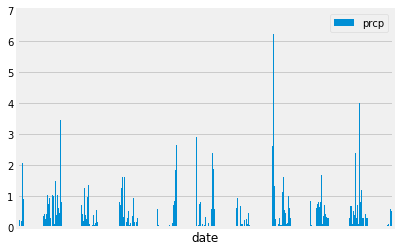

In [55]:
plt.figure(figsize=(12,6))
df_precipitation_by_date.plot(kind = 'bar', label = 'precipitation')
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
plt.grid(axis = 'x')
plt.show()

In [66]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_precipitation.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [38]:
#Query number of stations
session.query(Station.station).count()

9

In [39]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

no_data_per_station = session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).\
    all()
no_data_per_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [79]:
#Since no_data_per_station is sorted descending, the first data will be the biggest
no_data_per_station[0][0]

'USC00519281'

In [85]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == no_data_per_station[0][0]).\
    all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

Answer:

In [91]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

obs_temp_highest_station = session.query(Measurement.tobs).\
    filter(Measurement.station == no_data_per_station[0][0]).\
    filter(Measurement.date >= a_year_ago).all()
len(obs_temp_highest_station)

352

In [105]:
obs_temp_4plot = [obs_temp_highest_station[0] for obs_temp_highest_station in obs_temp_highest_station]

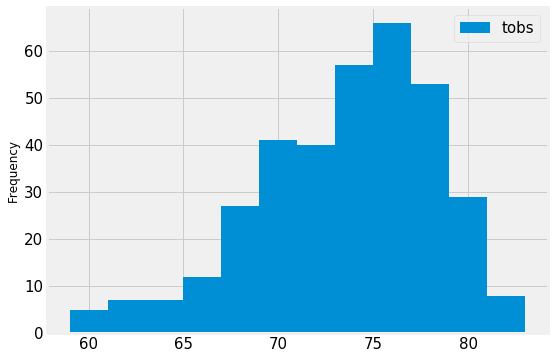

In [401]:
plt.figure(figsize=(8,6))
plt.hist(obs_temp_4plot, bins = 12, label ='tobs')
plt.ylabel("Frequency")
plt.tick_params(labelsize=15)
plt.legend(fontsize=15)
plt.show()

------------------------------------------------------------------------------------------------------------------------------

# Step 2 - Climate App

Please refer to app.py for answer

--------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------

# Other Recommended Analyses

# Temperature Analysis I

In [284]:
#Hawaii is reputed to enjoy mild weather all year. 
#Is there a meaningful difference between the temperature in, for example, June and December?
#You may either use SQLAlchemy or pandas's read_csv() to perform this portion.

file = "Resources/hawaii_measurements.csv"
hawaii_data = pd.read_csv(file)
hawaii_data.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [263]:
hawaii_data['date'] = pd.to_datetime(hawaii_data['date'])
hawaii_data['month'] = hawaii_data['date'].dt.month
hawaii_data.head()

,station,date,prcp,tobs,month
0,USC00519397,2010-01-01,0.08,65,1
1,USC00519397,2010-01-02,0.00,63,1
2,USC00519397,2010-01-03,0.00,74,1
3,USC00519397,2010-01-04,0.00,76,1
4,USC00519397,2010-01-06,NaN,73,1


In [269]:
#Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.
df_temp_obs_month = hawaii_data[["tobs","month"]]

Avg_temp_month = df_temp_obs_month.groupby("month").mean()
Avg_temp_month

,tobs
month,
1,68.726115
2,69.442236
3,70.059067
4,72.357268
5,73.680900
6,74.944118
7,76.082408
8,76.412454
9,76.164865


In [275]:
df_temp_june = df_temp_obs_month[df_temp_obs_month['month'] == 6]
df_temp_june.count()

df_temp_dec = df_temp_obs_month[df_temp_obs_month['month'] == 12]
df_temp_dec.count()

tobs     1517
month    1517
dtype: int64

In [270]:
#Will you use a paired t-test, or an unpaired t-test? Why?

Should use a paired t-test, because data is generated from same test subjects, the same 9 stations. 

In [276]:
#Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
#Will you use a paired t-test, or an unpaired t-test? Why?
from scipy import stats

t_stat, p = stats.ttest_ind(df_temp_june["tobs"],df_temp_dec["tobs"],equal_var=False)

In [283]:
t_stat, p

(31.355036920962423, 4.193529835915755e-187)

Since value of p < alpha = 0.05, the difference in the means is a statistically significant.

# Temperature Analysis II

In [206]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [289]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.temp_fr_function = calc_temps(a_year_ago, last_date[0])
TMIN = temp_fr_function[0][0]  
TAVE = temp_fr_function[0][1] 
TMAX = temp_fr_function[0][2] 
temp_fr_function

[(58.0, 74.59058295964125, 87.0)]

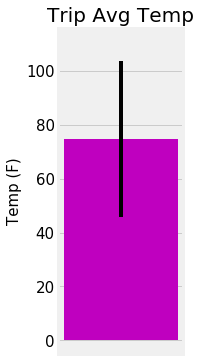

In [413]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value

plt.figure(figsize=(2,6))
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
std = TMAX - TMIN
plt.bar(0, TAVE, yerr=std, width=0.8, color = 'm')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temp (F)", fontsize=15)
plt.xticks([])
plt.tick_params(labelsize = 15)
plt.ylim(-5,TMAX+std)
plt.show()

# Daily Rainfall Average

In [239]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
session.query(Measurement.station, Station.name, Station.latitude, Station.longitude , Station.elevation , func.sum(Measurement.prcp)).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= a_year_ago).\
    filter(Measurement.date <= last_date[0]).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).\
    all()

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  147.81000000000006),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  70.03000000000003),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  48.510000000000026),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  38.01),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  33.239999999999995),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  16.089999999999986),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 4.59)]

## Optional Challenge Assignment

In [40]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [41]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
date1 = '2017-01-01'
date2 = '2017-01-08'
days = pd.date_range(date1, date2).tolist()

In [42]:
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date
daily_normal_result = []

for day in days:
    daily_normal_dict = {}
    result = day.strftime('%m-%d')
    result_daily_normals = daily_normals(result)
    date = day.strftime('%Y-%m-%d')
    daily_normal_dict["date"] = date
    daily_normal_dict["tmin"] = result_daily_normals[0][0]
    daily_normal_dict["tavg"] = result_daily_normals[0][1]
    daily_normal_dict["tmax"] = result_daily_normals[0][2]
    daily_normal_result.append(daily_normal_dict)

In [43]:
daily_normal_result

[{'date': '2017-01-01', 'tmin': 62.0, 'tavg': 69.15384615384616, 'tmax': 77.0},
 {'date': '2017-01-02', 'tmin': 60.0, 'tavg': 69.39622641509433, 'tmax': 77.0},
 {'date': '2017-01-03', 'tmin': 62.0, 'tavg': 68.9090909090909, 'tmax': 77.0},
 {'date': '2017-01-04', 'tmin': 58.0, 'tavg': 70.0, 'tmax': 76.0},
 {'date': '2017-01-05', 'tmin': 56.0, 'tavg': 67.96428571428571, 'tmax': 76.0},
 {'date': '2017-01-06', 'tmin': 61.0, 'tavg': 68.96491228070175, 'tmax': 76.0},
 {'date': '2017-01-07', 'tmin': 57.0, 'tavg': 68.54385964912281, 'tmax': 76.0},
 {'date': '2017-01-08', 'tmin': 57.0, 'tavg': 67.16071428571429, 'tmax': 75.0}]

In [45]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df_daily_normal = pd.DataFrame(daily_normal_result) 
df_daily_normal.set_index('date')

,tavg,tmax,tmin
date,,,
2017-01-01,69.153846,77.0,62.0
2017-01-02,69.396226,77.0,60.0
2017-01-03,68.909091,77.0,62.0
2017-01-04,70.000000,76.0,58.0
2017-01-05,67.964286,76.0,56.0
2017-01-06,68.964912,76.0,61.0
2017-01-07,68.543860,76.0,57.0
2017-01-08,67.160714,75.0,57.0


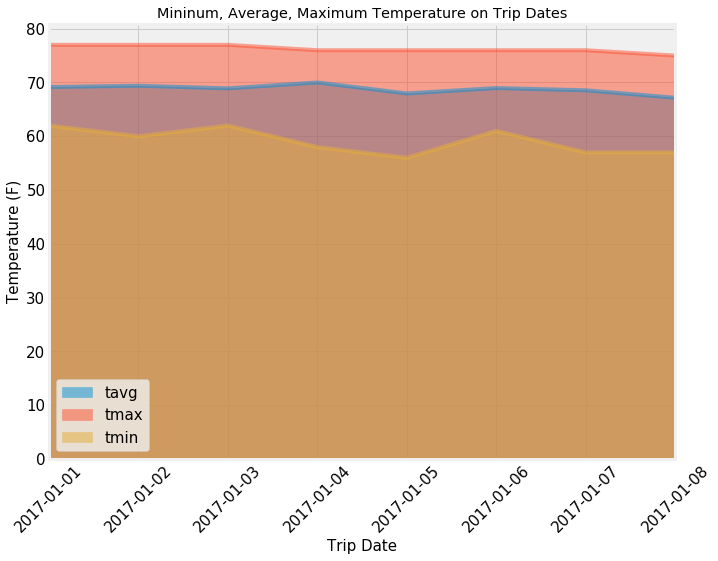

In [46]:
# Plot the daily normals as an area plot with `stacked=False`
ax = df_daily_normal.plot.area(x ='date',stacked=False)
plt.xticks(np.arange(len(days)), label = 'date', rotation=45)
plt.title("Mininum, Average, Maximum Temperature on Trip Dates")
plt.xlabel("Trip Date", fontsize = 15)
plt.ylabel("Temperature (F)", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.legend(loc = 'best', fontsize=15)
plt.gcf().set_size_inches(10, 8)
plt.show()